In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from dateutil import rrule
from datetime import datetime, timedelta
import random
import xlrd
%matplotlib inline
#%matplotlib notebook

In [2]:
!pwd


/Users/bbarsness/code/map_gdelt_events


In [3]:
#df = pd.read_csv("test.csv")
#df = pd.read_csv("deviations.csv")
df = pd.read_excel("deviations_actors_mw.xlsx")
# convert the graduation date column to datetime objects
#df["Grad Date"] = datetime.strptime(df['MonthYear'], "%Y%m").date()
df["MonthYear"] = pd.to_datetime(df["MonthYear"], format='%Y%m')
#df["Count"] = pd.to_numeric(df["Count"])
df["size"] = pd.to_numeric(df["size"])
df.dropna(subset=['Actor2Code', 'Actor2Geo_Lat', 'Actor2Geo_Long'], inplace=True)

In [4]:
df.head()

,Class,MonthYear,Actor2Code,Count,med,absdev,normalizer,size,Actor2Geo_Lat,Actor2Geo_Long
74,1,2015-10-01,afa,18,3.0,15.0,173,0.086705,35.0000,105.000
75,1,2017-07-01,afa,11,3.0,8.0,173,0.046243,35.0000,105.000
76,1,2018-09-01,afa,11,3.0,8.0,173,0.046243,35.0000,105.000
77,1,2016-07-01,deupty,10,1.0,9.0,12,0.750000,52.5167,13.400
78,1,2016-08-01,din,10,6.0,4.0,12,0.333333,39.9289,116.388


In [5]:
df.shape

(26728, 10)

47 2018-11-01 00:00:00


/anaconda3/envs/gdelt3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


48 2018-12-01 00:00:00
49 2019-01-01 00:00:00
50 2019-02-01 00:00:00


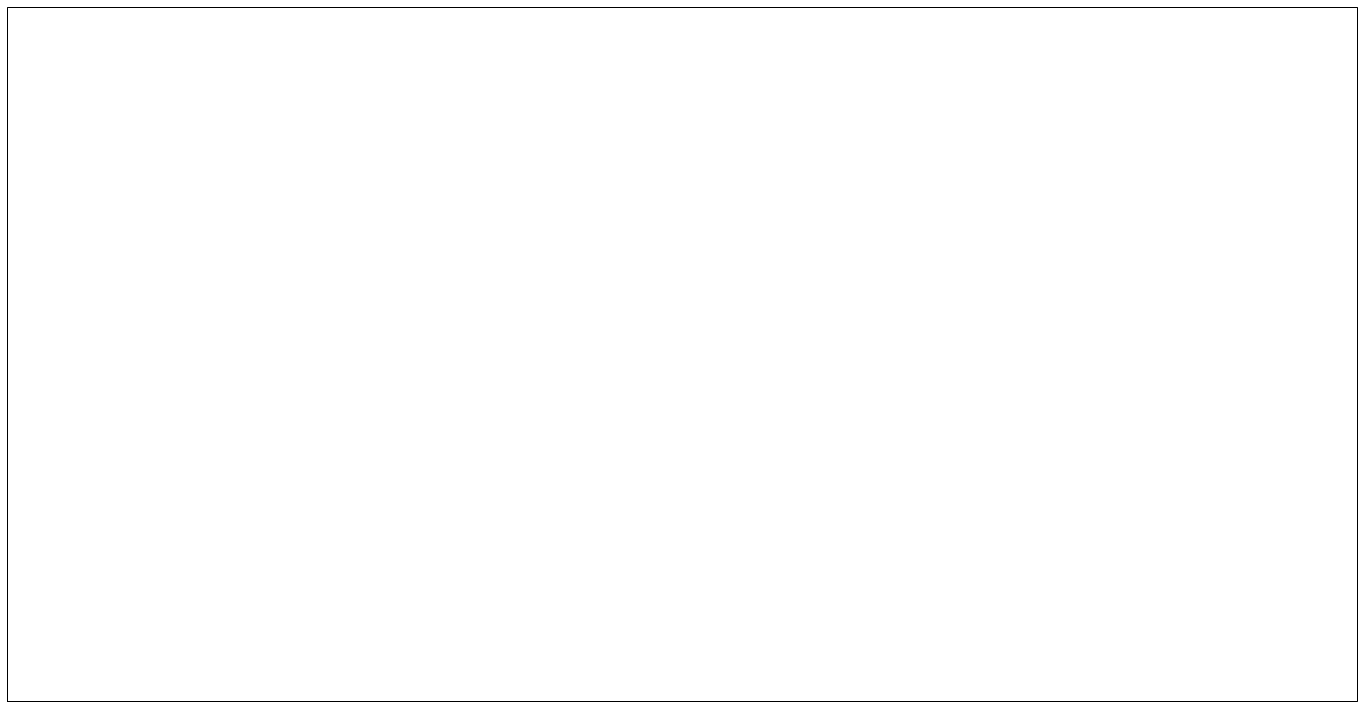

In [6]:
def make_events_map(date, data, ax=None, resolution='low'):
    
    if ax is None:
        fig = plt.figure(figsize=(19.2, 10.8))
        ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,
                                               min_latitude=-65,
                                               max_latitude=70))
    
    ax.background_img(name='ne_shaded', resolution=resolution)
    #ax.background_img(name='BM', resolution=resolution)
    ax.set_extent([-170, 179, -65, 70], crs=ccrs.PlateCarree())
    reports = data[data['MonthYear'] == date] 
    
    ### rest of the code
    # Define colors for each class of event
    colors = {1: '#02b3e4',
              2: '#f95c3c' ,
              3: '#27C155', #'#ff5483',
              4: '#ecc81a'}

    for index, report in reports.iterrows():
        
        lat = report['Actor2Geo_Lat'] #+ random.uniform(-1, 1)
        long = report['Actor2Geo_Long'] #+ random.uniform(-1, 1)
        size = report['size'] * 1000

        ax.scatter(long, lat, s=size,color=colors[report['Class']], alpha=0.5, transform=ccrs.PlateCarree())

    fontname = 'Open Sans'
    fontsize = 28
    # Positions for the date and grad counter
    date_x = -10 #-53  
    date_y = -50
    date_spacing = 65
    # Positions for the event types
    name_x = -70
    name_y = -60      
    name_spacing = {classes[1]: 0,
                    classes[2]: 55,
                    classes[3]: 2*55, #1.9*55,
                    classes[4]: 3*55}
    # Date text
    ax.text(date_x, date_y, 
            f"{date.strftime('%b, %Y')}", 
            color='white',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())
    # Total grad counts
    #ax.text(date_x + date_spacing, date_y, 
    #        "GRADUATES", color='white',
    #        fontname=fontname, fontsize=fontsize,
    #        transform=ccrs.PlateCarree())
    #ax.text(date_x + date_spacing*1.7, date_y, 
    #        f"{grads.groupby(['Long', 'Lat']).count()['Class'].sum()}",
    #        color='white', ha='left',
    #        fontname=fontname, fontsize=fontsize*1.3,
    #        transform=ccrs.PlateCarree())
    for idx, event_name in enumerate([classes[1], classes[2], classes[3], classes[4]]):
        ax.text(name_x + name_spacing[event_name], 
                name_y, 
                event_name.upper(), ha='center',
                fontname=fontname, fontsize=fontsize*0.6,
                color=colors[idx+1],
                transform=ccrs.PlateCarree())

    return ax

classes = {1: 'Verbal Cooperation',
           2: 'Verbal Conflict',
           3: 'Material Cooperation',
           4: 'Material Conflict'}

start_date = datetime(2015, 1, 1)
#end_date = datetime(2015, 3, 1)
end_date = datetime(2019, 2, 1)
fig = plt.figure(figsize=(19.2, 10.8))
ax = plt.axes(projection=ccrs.Mercator(central_longitude=0,
                                       min_latitude=-65,
                                       max_latitude=70))
# Generate an image for each month between start_date and end_date

x = 1
for dt in rrule.rrule(rrule.MONTHLY, dtstart=start_date, until=end_date):
    print(x,dt)
    ax = make_events_map(dt, df, ax=ax, resolution='low')
    fig.tight_layout(pad=-0.5)
    fig.savefig(f"frames/Deviation/frame_{x:04d}.png", dpi=100,     
                frameon=False, facecolor='black')
    x=x+1
    ax.clear()